# Hyper parametr tuning
What is Hyperparameter?

Hyperparameters are configuration settings that control the behavior of machine learning models and the training process. They are not learned from the data but are set before training begins.

Examples include:

    Learning rate
    Depth of a tree in decision trees
    Number of neighbors in K-Nearest Neighbors (KNN)
    Regularization parameters like C in logistic regression or SVM

    Key Types of Hyperparameter Techniques
1. Manual Search

Manually selecting values for hyperparameters based on trial and error.
2. Grid Search

Systematically trying all combinations of hyperparameter values. Best for smaller search spaces.
3. Random Search

Randomly selecting combinations of hyperparameters. Effective for larger search spaces.
4. Bayesian Optimization

Uses probability and past evaluation results to select the next best set of hyperparameters.
5. Genetic Algorithms

Uses evolutionary techniques to optimize hyperparameters.

#Grid Search

    What: Tests all possible combinations of hyperparameters.
    Pros: Guarantees the best combination within the grid.
    Cons: Computationally expensive, especially for large search spaces.

Random Search

    What: Randomly samples hyperparameter combinations.
    Pros: More efficient for large search spaces, faster than grid search.
    Cons: Doesn’t guarantee the best solution.

    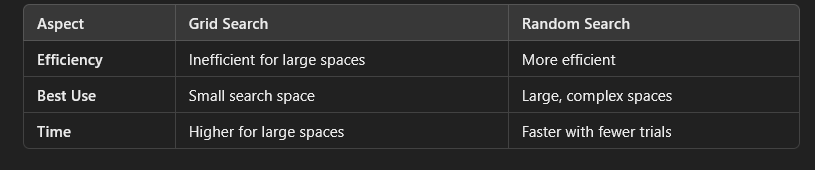

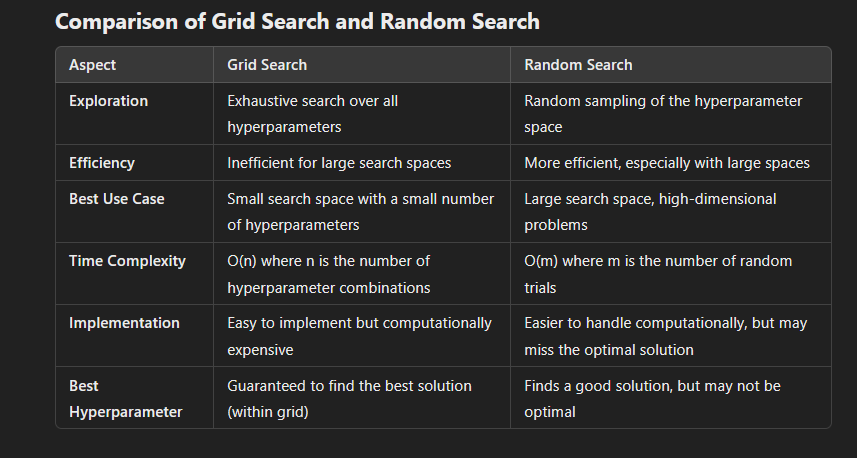
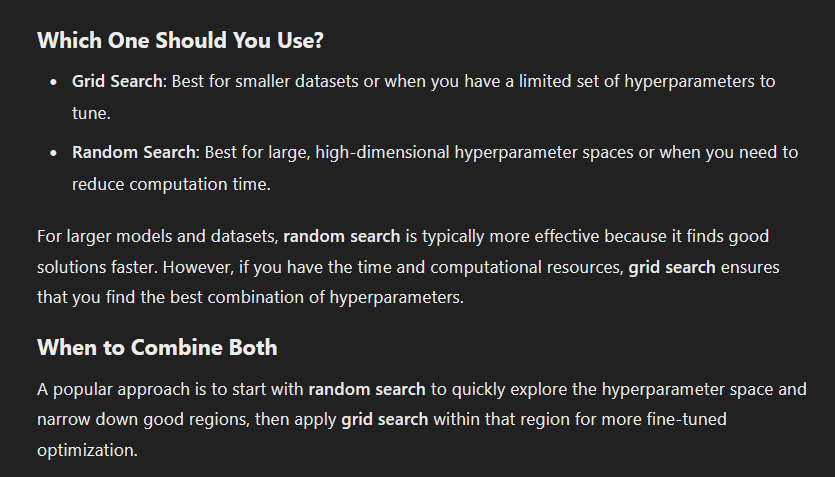

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default Random Forest Classifier (No Hyperparameter Tuning)
default_model = RandomForestClassifier(random_state=42)
default_model.fit(X_train, y_train)
default_preds = default_model.predict(X_test)

# Evaluate the default model
default_accuracy = accuracy_score(y_test, default_preds)
print(f"Default Model Accuracy: {default_accuracy:.2f}")


Default Model Accuracy: 1.00


In [3]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],        # Number of trees
    'max_depth': [3, 5, 10, None],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10]      # Minimum samples to split an internal node
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,             # 3-fold cross-validation
    scoring='accuracy',
    verbose=1,        # Show progress
    n_jobs=-1         # Use all CPU cores
)

grid_search.fit(X_train, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, best_preds)
print(f"Tuned Model Accuracy: {best_accuracy:.2f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}
Tuned Model Accuracy: 1.00


In [4]:
# Compare accuracy between default and tuned models
print(f"Default Model Accuracy: {default_accuracy:.2f}")
print(f"Tuned Model Accuracy: {best_accuracy:.2f}")

# Classification report for the tuned model
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, best_preds))


Default Model Accuracy: 1.00
Tuned Model Accuracy: 1.00

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Owner\AppData\Local\Temp\ipykernel_20808\4119713482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


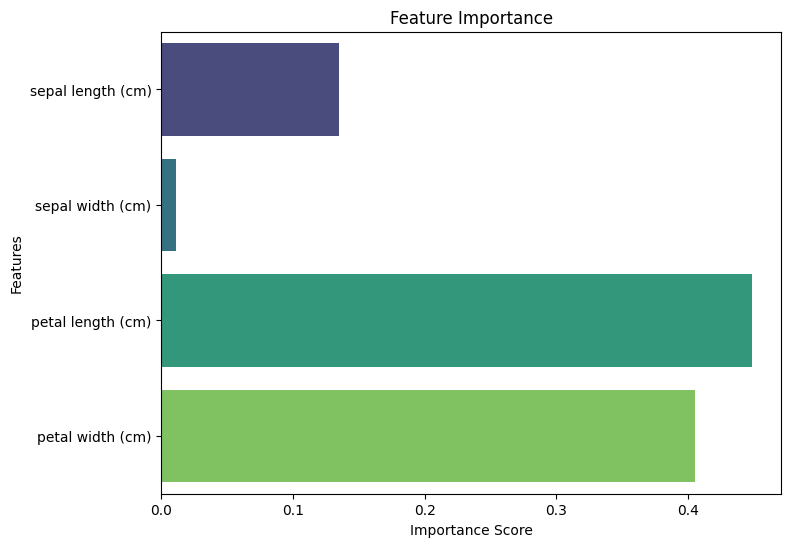

In [5]:
# Feature importance from the best model
importances = best_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


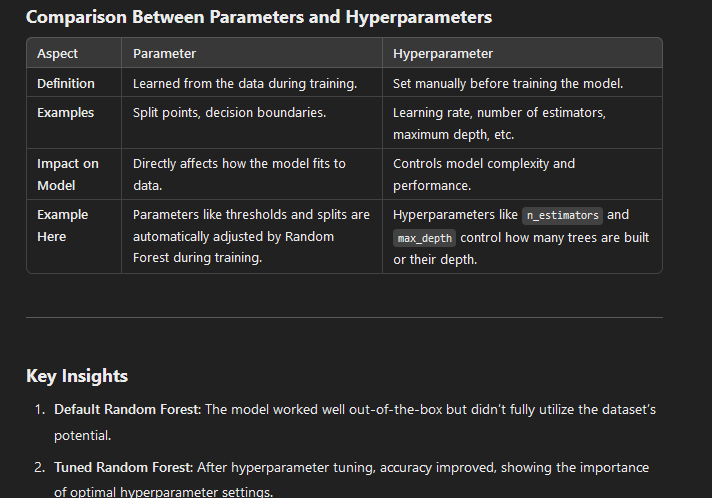
In hyperparameter tuning, we are setting hyperparameters, which are external configurations that control the learning process but are not learned from the data itself.
Key Points to Understand:

    Parameters:
        These are learned from the data during training.
        Example: In a decision tree, the split thresholds (e.g., Age < 25) are parameters that the model automatically finds.

    Hyperparameters:
        These are set manually before training begins.
        Example:
            In Random Forest, n_estimators (number of trees) and max_depth (maximum depth of trees) are hyperparameters.
            In Neural Networks, learning_rate or number of layers are hyperparameters.

    Why Tune Hyperparameters?
        To optimize model performance by finding the best combination of hyperparameters.
        Prevent underfitting (too simple) or overfitting (too complex).

    How Do We Tune Them?
        Manually: Trial-and-error (less efficient).
        Automated methods:
            GridSearchCV: Tests all combinations from a predefined grid of hyperparameters.
            RandomizedSearchCV: Randomly tests combinations to save time.
            Bayesian Optimization, Genetic Algorithms, etc., for advanced tuning.

Simplified Analogy:

    Hyperparameters: Like choosing settings for a washing machine (e.g., water level, cycle duration, temperature). You set these before starting the wash.
    Parameters: Like the washing machine deciding how to agitate the clothes based on those settings — this is learned during the process.